In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
import scipy
from matplotlib.lines import Line2D

WT_COL='darkblue'
D7_COL='royalblue'

D4_COL = 'red'
D12_COL = 'orange'

## Summary

**[Reweighters](#rw)**

**[Flory scaling](#flory_1)**

**[Full HPS results](#hps_1)**

**[HPS Single chain Results](#2)**

**[HPS-T Single chain Results](#3)**

**[HPS-T Slab Results](#3)**

**[HPS-T Slab Results](#Fitt)**

**[E4 Variants](#4)**

**[KH](#5)**

**[RPA](#6)**


### Reweighters <a id='rw'></a>

In [ ]:
d12 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/12D_D4')
d4 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/D4')

> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations


In [ ]:
epss = np.linspace(80,70,4)
lss = np.linspace(1,0.9,4)

from_1 = lmp.LMP(None)
from_1.maximize_charge(above_obj=d12, 
                       below_obj=d4,
                       T=0,
                       l0=1,
                       eps0=80,
                       epss=epss, 
                       lss=lss)

> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 


In [73]:
ls=["1.0","0.8", "0.75", "0.6"]
data = []
T=0
for l in ls:
    if len(data) == 0:
        data = np.genfromtxt(f'/home/adria/rw_results2/rw_{l}_HPST-{T}.txt', skip_header=1)
    else:
        test = np.genfromtxt(f'/home/adria/rw_results2/rw_{l}_HPST-{T}.txt', skip_header=1)
        data = np.concatenate([data, test])

df = pd.DataFrame(data,)

In [69]:
df

,0,1,2,3,4,5,6
0,0.95,80.000,-2.907,0.018,0.004,35.631,38.538
1,0.95,74.286,-2.907,0.018,0.004,35.631,38.538
2,0.95,68.571,-2.907,0.018,0.004,35.631,38.538
3,0.95,62.857,-2.907,0.018,0.004,35.631,38.538
4,0.95,57.143,-2.907,0.018,0.004,35.631,38.538
...,...,...,...,...,...,...,...
251,0.65,62.857,-1.286,0.180,0.228,65.350,66.637
252,0.65,57.143,-1.286,0.180,0.228,65.350,66.637
253,0.65,51.429,-1.286,0.180,0.228,65.350,66.637
254,0.65,45.714,-1.286,0.180,0.228,65.350,66.637


In [15]:
lambdas = np.unique(np.concatenate((rw08[0,:,0], rw1[0,:,0])))
eps = np.unique(rw08[0,:,1])

df = pd.DataFrame(np.random.randint(4, size=(len(lambdas),len(eps))), index=lambdas, columns=eps, dtype='float')
df2 = pd.DataFrame(np.random.randint(4, size=(len(lambdas),len(eps))), index=lambdas, columns=eps, dtype='float')


for i in range(16):
    eps = rw08[0,i,1]
    ls = rw08[0,i,0]
    ls2 = rw1[0,i,0]
    
    df[eps][ls] = rw08[0,i,2]
    df[eps][ls2] = rw1[0,i,2]
    df2[eps][ls] = rw08[0,i,3]
    df2[eps][ls2] = rw1[0,i,3]
    
      


,0.750,0.783,0.817,0.850,0.950,0.983,1.017,1.050
40.000,3.795,4.616,5.649,6.339,0.971,0.827,0.489,0.115
53.333,2.562,3.017,3.745,4.630,1.113,0.974,0.753,0.489
66.667,2.091,2.435,2.985,3.736,1.196,1.071,0.861,0.633
80.000,1.885,2.174,2.639,3.281,1.194,1.099,0.897,0.683


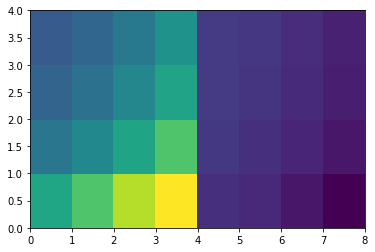

In [17]:
plt.pcolor(df.T)

In [18]:
df2.T

,0.750,0.783,0.817,0.850,0.950,0.983,1.017,1.050
40.000,0.118,0.080,0.037,0.013,0.104,0.096,0.060,0.030
53.333,0.561,0.547,0.384,0.173,0.427,0.510,0.394,0.201
66.667,0.779,0.911,0.807,0.481,0.611,0.872,0.788,0.450
80.000,0.763,0.966,0.961,0.668,0.588,0.941,0.941,0.583


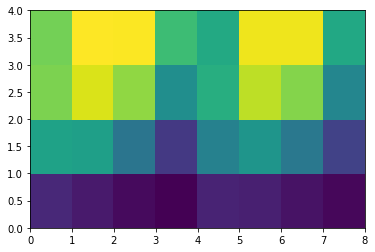

In [19]:
plt.pcolor(df2.T)

### Flory scaling <a id='flory_1'></a>

In [ ]:
s = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/1.0/WT', total_frames=1000)

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 


In [92]:
florys, r0s, covs = s.flory_scaling_fit()

MemoryError: Unable to allocate array with shape (99701, 199809) and data type float32

### Full HPS results <a id='hps_1'></a>

### HPS Single chain Results <a id='2'></a>

#### Cat-pi extension

In [34]:
wt = hmd.HMD(md_dir='/home/adria/irb/hoomd/FINAL/hps-cat2/WT')

In [35]:
wt.rg()

(array([21.75211724, 21.98538657, 22.4238929 , 22.81859973]),
 array([0.01308049, 0.03986672, 0.07285253, 0.02123847]))

In [36]:
d4 = hmd.HMD(md_dir='/home/adria/irb/hoomd/FINAL/hps-cat2/D4')

In [37]:
d4.rg()

(array([21.26667832, 21.61398157, 22.38096376, 22.95826244]),
 array([0.04824491, 0.02611573, 0.01758172, 0.02372443]))

#### $\lambda$ vars

In [2]:
# 1.0
wt_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/WT')
wt_1.rg()
d4_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/D4')
d4_1.rg()
d7_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/7D_WT')
d7_1.rg()
d12_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/12D_D4')
d12_1.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations


MemoryError: Unable to allocate array with shape (99701, 440, 3) and data type float32

### HPS-T Single chain Results <a id='3'></a>

In [20]:
# 1.0
wt_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/1.0/WT', low_mem=True)
wt_1.rg()
d4_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/1.0/D4', low_mem=True)
d4_1.rg()
d7_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/1.0/7D_WT', low_mem=True)
d7_1.rg()
d12_1 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/1.0/12D_D4', low_mem=True)
d12_1.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

In [21]:
# 0.8
wt_8 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.8/WT', low_mem=True)
wt_8.rg()
d4_8 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.8/D4', low_mem=True)
d4_8.rg()
d7_8 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.8/7D_WT', low_mem=True)
d7_8.rg()
d12_8 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.8/12D_D4', low_mem=True)
d12_8.rg()

> Run Completed at 62.72% for CPEB4_alpha. Ran 627200000 steps for a total of 62721 frames 
> Taking frames every None for a total of [97401, 80020, 70696, 67368, 62437, 69674, 83422, 99701] to avoid strong correlations
> Run Completed at 59.35% for CPEB4_D4. Ran 593490000 steps for a total of 59350 frames 
> Taking frames every None for a total of [79848, 69434, 60541, 59055, 60654, 67671, 77478, 93779] to avoid strong correlations
> Run Completed at 64.86% for 7D_CPEB4. Ran 648580000 steps for a total of 64859 frames 
> Taking frames every None for a total of [83533, 77098, 66611, 64731, 64566, 65224, 82299, 87847] to avoid strong correlations
> Run Completed at 53.27% for 12D_CPEB4_D4. Ran 532680000 steps for a total of 53269 frames 
> Taking frames every None for a total of [83323, 63252, 66341, 52969, 54794, 64251, 80140, 81481] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

In [23]:
# 0.75
wt_75 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75_New/WT', low_mem=True)
wt_75.rg(save='WT_075.txt')
d4_75 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75_New/D4', low_mem=True)
d4_75.rg(save='D4_075.txt')
d7_75 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75_New/7D_WT', low_mem=True)
d7_75.rg(save='7D_075.txt')
d12_75 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.75_New/12D_D4', low_mem=True)
d12_75.rg(save='12D_075.txt')

> Run Completed at 46.49% for CPEB4_alpha. Ran 464870000 steps for a total of 46488 frames 
> Taking frames every None for a total of [60558, 55201, 49661, 46236, 48685, 48087, 58649, 66202] to avoid strong correlations
> Run Completed at 46.22% for CPEB4_D4. Ran 462230000 steps for a total of 46224 frames 
> Taking frames every None for a total of [65350, 59718, 53442, 48422, 45982, 51317, 58184, 65834] to avoid strong correlations
> Run Completed at 46.87% for 7D_CPEB4. Ran 468680000 steps for a total of 46869 frames 
> Taking frames every None for a total of [65984, 59138, 54355, 49379, 46603, 50468, 57751, 64698] to avoid strong correlations
> Run Completed at 45.09% for 12D_CPEB4_D4. Ran 450940000 steps for a total of 45095 frames 
> Taking frames every None for a total of [61199, 53947, 46345, 44805, 56790, 61979, 71355, 79882] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

In [24]:
# 0.7
wt_7 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.7/WT', low_mem=True)
wt_7.rg()
d4_7 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.7/D4', low_mem=True)
d4_7.rg()
d7_7 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.7/7D_WT', low_mem=True)
d7_7.rg()
d12_7 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.7/12D_D4', low_mem=True)
d12_7.rg()

> Run Completed at 15.71% for CPEB4_alpha. Ran 157130000 steps for a total of 15714 frames 
> Taking frames every None for a total of [19340, 18539, 15422, 16455, 15593, 15464, 18983, 20296] to avoid strong correlations
> Run Completed at 16.11% for CPEB4_D4. Ran 161140000 steps for a total of 16115 frames 
> Taking frames every None for a total of [21080, 16185, 16664, 15822, 16000, 16912, 18366, 20800] to avoid strong correlations
> Run Completed at 47.22% for 7D_CPEB4. Ran 472210000 steps for a total of 47222 frames 
> Taking frames every None for a total of [55572, 52863, 48295, 46955, 47354, 50785, 53757, 60345] to avoid strong correlations
> Run Completed at 14.64% for 12D_CPEB4_D4. Ran 146390000 steps for a total of 14640 frames 
> Taking frames every None for a total of [17972, 16904, 15889, 14345, 16427, 17117, 17210, 16840] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

In [25]:
# 0.6
wt_6 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.6/WT', low_mem=True)
wt_6.rg()
d4_6 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.6/D4', low_mem=True)
d4_6.rg()
d7_6 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.6/7D_WT', low_mem=True)
d7_6.rg()
d12_6 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS-T/0.6/12D_D4', low_mem=True)
d12_6.rg()

> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for 7D_CPEB4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for 12D_CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations


(array([], dtype=float64), array([], dtype=float64))

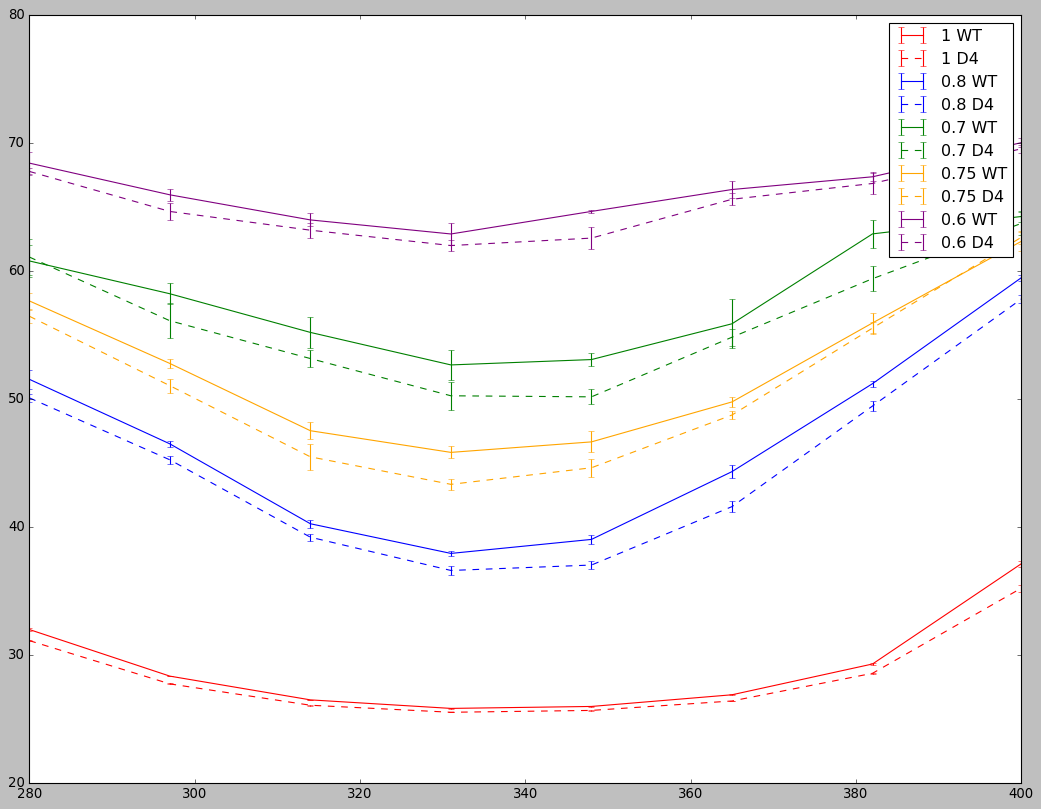

In [90]:
plt.style.use('classic')

plt.figure(figsize=(16,12))
plt.errorbar(wt_1.temperatures, wt_1.c_rg[0], yerr=wt_1.c_rg[1], label='1 WT', color='red')
plt.errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], label='1 D4', color='red', ls='--')
plt.errorbar(wt_8.temperatures, wt_8.c_rg[0], yerr=wt_8.c_rg[1], label='0.8 WT', color='blue')
plt.errorbar(d4_8.temperatures, d4_8.c_rg[0], yerr=d4_8.c_rg[1], label='0.8 D4', color='blue', ls='--')
plt.errorbar(wt_7.temperatures, wt_7.c_rg[0], yerr=wt_7.c_rg[1], label='0.7 WT', color='green')
plt.errorbar(d4_7.temperatures, d4_7.c_rg[0], yerr=d4_7.c_rg[1], label='0.7 D4', color='green', ls='--')
plt.errorbar(wt_75.temperatures, wt_75.c_rg[0], yerr=wt_75.c_rg[1], label='0.75 WT', color='orange')
plt.errorbar(d4_75.temperatures, d4_75.c_rg[0], yerr=d4_75.c_rg[1], label='0.75 D4', color='orange', ls='--')
plt.errorbar(wt_6.temperatures, wt_6.c_rg[0], yerr=wt_6.c_rg[1], label='0.6 WT', color='purple')
plt.errorbar(d4_6.temperatures, d4_6.c_rg[0], yerr=d4_6.c_rg[1], label='0.6 D4', color='purple', ls='--')
plt.legend()

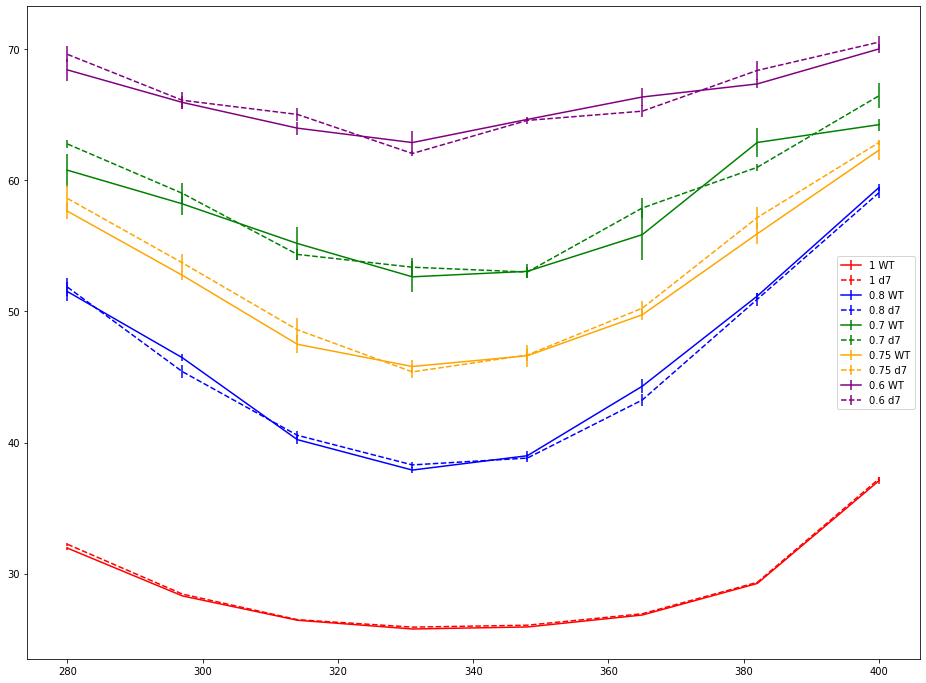

In [30]:
plt.figure(figsize=(16,12))
plt.errorbar(wt_1.temperatures, wt_1.c_rg[0], yerr=wt_1.c_rg[1], label='1 WT', color='red')
plt.errorbar(d7_1.temperatures, d7_1.c_rg[0], yerr=d7_1.c_rg[1], label='1 d7', color='red', ls='--')
plt.errorbar(wt_8.temperatures, wt_8.c_rg[0], yerr=wt_8.c_rg[1], label='0.8 WT', color='blue')
plt.errorbar(d7_8.temperatures, d7_8.c_rg[0], yerr=d7_8.c_rg[1], label='0.8 d7', color='blue', ls='--')
plt.errorbar(wt_7.temperatures, wt_7.c_rg[0], yerr=wt_7.c_rg[1], label='0.7 WT', color='green')
plt.errorbar(d7_7.temperatures, d7_7.c_rg[0], yerr=d7_7.c_rg[1], label='0.7 d7', color='green', ls='--')
plt.errorbar(wt_75.temperatures, wt_75.c_rg[0], yerr=wt_75.c_rg[1], label='0.75 WT', color='orange')
plt.errorbar(d7_75.temperatures, d7_75.c_rg[0], yerr=d7_75.c_rg[1], label='0.75 d7', color='orange', ls='--')
plt.errorbar(wt_6.temperatures, wt_6.c_rg[0], yerr=wt_6.c_rg[1], label='0.6 WT', color='purple')
plt.errorbar(d7_6.temperatures, d7_6.c_rg[0], yerr=d7_6.c_rg[1], label='0.6 d7', color='purple', ls='--')
plt.legend()

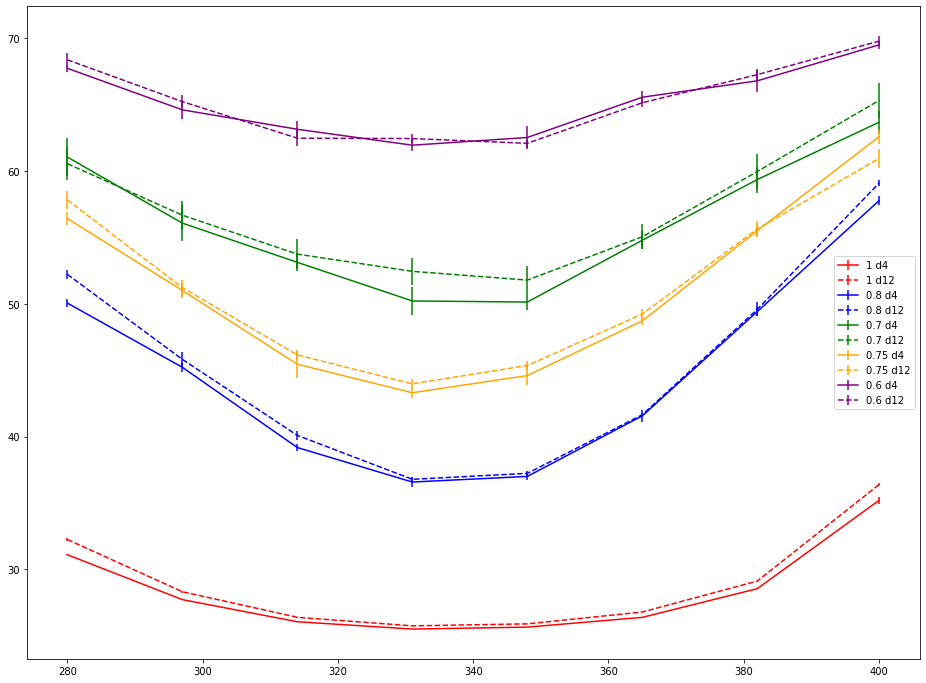

In [31]:
plt.figure(figsize=(16,12))
plt.errorbar(d4_1.temperatures, d4_1.c_rg[0], yerr=d4_1.c_rg[1], label='1 d4', color='red')
plt.errorbar(d12_1.temperatures, d12_1.c_rg[0], yerr=d12_1.c_rg[1], label='1 d12', color='red', ls='--')
plt.errorbar(d4_8.temperatures, d4_8.c_rg[0], yerr=d4_8.c_rg[1], label='0.8 d4', color='blue')
plt.errorbar(d12_8.temperatures, d12_8.c_rg[0], yerr=d12_8.c_rg[1], label='0.8 d12', color='blue', ls='--')
plt.errorbar(d4_7.temperatures, d4_7.c_rg[0], yerr=d4_7.c_rg[1], label='0.7 d4', color='green')
plt.errorbar(d12_7.temperatures, d12_7.c_rg[0], yerr=d12_7.c_rg[1], label='0.7 d12', color='green', ls='--')
plt.errorbar(d4_75.temperatures, d4_75.c_rg[0], yerr=d4_75.c_rg[1], label='0.75 d4', color='orange')
plt.errorbar(d12_75.temperatures, d12_75.c_rg[0], yerr=d12_75.c_rg[1], label='0.75 d12', color='orange', ls='--')
plt.errorbar(d4_6.temperatures, d4_6.c_rg[0], yerr=d4_6.c_rg[1], label='0.6 d4', color='purple')
plt.errorbar(d12_6.temperatures, d12_6.c_rg[0], yerr=d12_6.c_rg[1], label='0.6 d12', color='purple', ls='--')
plt.legend()

### HPS-T Slab Results <a id='3'></a>

In [ ]:
t = hmd.HMD(md_dir='/home/adria/irb/hoomd/FINAL/red-08-WT-20')

In [ ]:
t.phase_diagram()

### E4 Variants <a id='4'></a>

**R to K**

In [2]:
r_to_k = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS_vars/CPEB4_RtoK')
r_to_k.rg()
wt = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/WT')
wt.rg()
d4 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/D4')
d4.rg()

> Run Completed at 54.77% for CPEB4_RtoK. Ran 547680000 steps for a total of 54769 frames 
> Taking frames every None for a total of [54486, 59425, 62850, 70802, 78261, 88245, 97394, 99701] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations


(array([26.32991413, 27.78764269, 29.81671626, 32.75156679, 36.66133437,
        41.70787223, 45.92128259, 49.92548439]),
 array([0.01484287, 0.01835598, 0.09475665, 0.1304525 , 0.21835396,
        0.28819253, 0.43247206, 0.3266235 ]))

<ErrorbarContainer object of 3 artists>

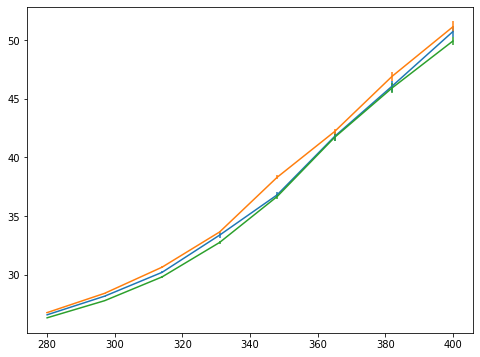

In [3]:
plt.figure(figsize=(8,6))
plt.errorbar(r_to_k.temperatures, r_to_k.c_rg[0], yerr=r_to_k.c_rg[1])
plt.errorbar(wt.temperatures, wt.c_rg[0],  yerr=wt.c_rg[1])
plt.errorbar(d4.temperatures, d4.c_rg[0], yerr=d4.c_rg[1])

### KH <a id='5'></a>

**REPRODUCIBILITY**

Text(0, 0.5, 'Rg Sim ($\\AA$)')

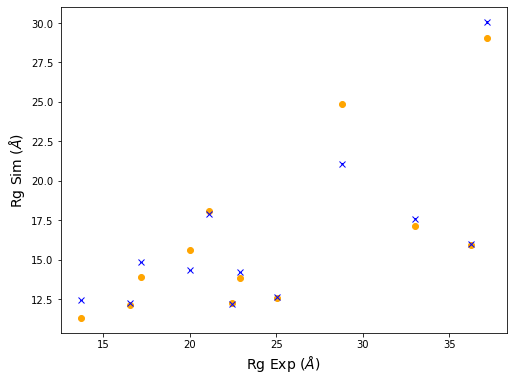

In [6]:
test_prots = ['CspTm', 'Integrase', 'ProTa-N', 'ProTa-C', 'R15', 'R17',
              'hCyp', 'Protein-L', 'ACTR', 'hNHE1cdt', 'sNase', 'ASYN']

dig_data = np.genfromtxt('/home/adria/documents/KH_data.csv')*10.

plt.figure(figsize=(8,6))
for i, prot in enumerate(test_prots):
    tr = lmp.LMP(md_dir=f'/home/adria/perdiux/prod/lammps/dignon/KH_test/{i}.{prot}', equil_frames=500, every=5, silent=True)
    rg = tr.rg() # 1 temperature
    plt.errorbar(dig_data[i,0], rg[0], yerr=rg[1], capsize=1, marker='x', color='blue')
    plt.plot(dig_data[i,0], dig_data[i,1], color='orange', marker='o')
plt.xlabel("Rg Exp ($\AA$)", fontsize=14)
plt.ylabel("Rg Sim ($\AA$)", fontsize=14)

**HPS-KH**

In [5]:
hyb_full = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS_vars/CPEB4_KH-HPS-HYB')
hyb_full.rg()
hyb_full_d4 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS_vars/CPEB4_D4_KH-HPS-HYB/')
hyb_full_d4.rg()
wt = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/WT')
wt.rg()
d4 = lmp.LMP(md_dir='/home/adria/perdiux/prod/lammps/final/HPS/D4')
d4.rg()

> Run Completed at 40.72% for CPEB4_alpha. Ran 407230000 steps for a total of 40724 frames 
> Taking frames every None for a total of [40428, 44459, 49490, 56153, 65969, 74208] to avoid strong correlations
> Run Completed at 8.18% for CPEB4_D4. Ran 81820000 steps for a total of 8183 frames 
> Taking frames every None for a total of [7886, 8704, 10395, 11340, 13023, 14994] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_alpha. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations
> Run Completed at 100.00% for CPEB4_D4. Ran 1000000000 steps for a total of 100001 frames 
> Taking frames every None for a total of [99701, 99701, 99701, 99701, 99701, 99701, 99701, 99701] to avoid strong correlations


(array([26.32991413, 27.78764269, 29.81671626, 32.75156679, 36.66133437,
        41.70787223, 45.92128259, 49.92548439]),
 array([0.01484287, 0.01835598, 0.09475665, 0.1304525 , 0.21835396,
        0.28819253, 0.43247206, 0.3266235 ]))

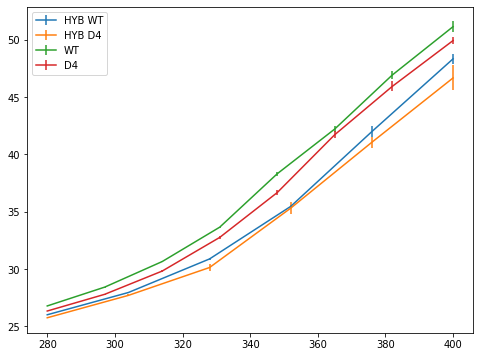

In [6]:
plt.figure(figsize=(8,6))
plt.errorbar(hyb_full.temperatures, hyb_full.c_rg[0], yerr=hyb_full.c_rg[1], label='HYB WT')
plt.errorbar(hyb_full_d4.temperatures, hyb_full_d4.c_rg[0], yerr=hyb_full_d4.c_rg[1], label='HYB D4')
plt.errorbar(wt.temperatures, wt.c_rg[0],  yerr=wt.c_rg[1], label='WT')
plt.errorbar(d4.temperatures, d4.c_rg[0], yerr=d4.c_rg[1], label='D4')
plt.legend()

### RPA <a id='6'></a>

#### FG-LCST

In [16]:
wt = np.genfromtxt('/home/adria/perdiux/prod/lammps/final/RPA/fg_lcst/bi_RPAFH_N448_phis_0.00180_CPEB4_eh-0.70_es1.50_umax2.28_du0.10_ddu0.01.txt')
d4 = np.genfromtxt('/home/adria/perdiux/prod/lammps/final/RPA/fg_lcst/bi_RPAFH_N440_phis_0.00180_CPEB4_D4_eh-0.70_es1.50_umax2.63_du0.10_ddu0.01.txt')

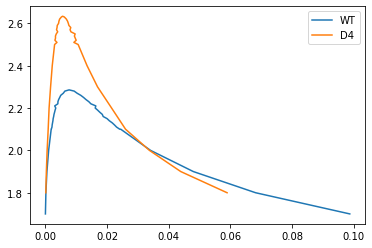

In [20]:
plt.plot(wt[:,0], wt[:,1], label='WT')
plt.plot(d4[:,0], d4[:,1], label='D4')
plt.legend()

#### FG-UCST

In [28]:
wt = np.genfromtxt('/home/adria/perdiux/prod/lammps/final/RPA/fg_ucst/bi_RPAFH_N448_phis_0.00180_CPEB4_eh0.00_es0.00_umax3.00_du0.10_ddu0.01.txt')
d4 = np.genfromtxt('/home/adria/perdiux/prod/lammps/final/RPA/fg_ucst/bi_RPAFH_N440_phis_0.00180_CPEB4_D4_eh0.00_es0.00_umax2.10_du0.10_ddu0.01.txt')

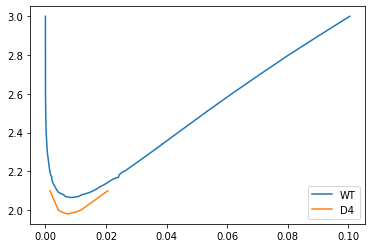

In [29]:
plt.plot(wt[:,0], wt[:,1], label='WT')
plt.plot(d4[:,0], d4[:,1], label='D4')
plt.legend()